In [50]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
PATH_FIGURES = Path("./figures/image_segmentation/")
PATH_DATA = Path("./dataset/images/")
plt.rcParams['font.family']=['serif']
plt.rcParams['mathtext.fontset'] = 'stix'
def savefig(fig, fname): fig.savefig(PATH_FIGURES.joinpath(fname), dpi=300)

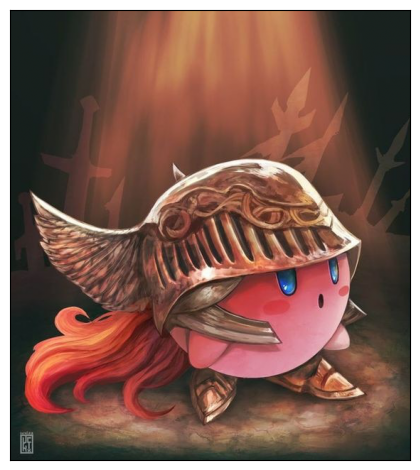

In [16]:
img = np.array(Image.open(PATH_DATA.joinpath("1.jpg"))) / 255
plt.imshow(img)
plt.xticks([]); plt.yticks([])
plt.tight_layout()
plt.show()

In [22]:
def getdis(x, mu):
    dis = []
    for i in range(mu.shape[0]):
        dis.append(np.sqrt(np.sum(np.power(x-mu[i], 2))))
    return dis
def kmeans(x, K, T=5):
    n, m, c = x.shape
    x = x.reshape(-1, 3)
    mu = np.random.normal(size=(K, 3))
    for _ in range(T+1):
        dis = np.array([getdis(x[i], mu) for i in range(x.shape[0])])
        r = np.argmin(dis, axis=1)
        mu = np.array([np.mean(x[r==i], axis=0) for i in range(mu.shape[0])])
    return np.array([mu[i] for i in r]).reshape(n, m, c)


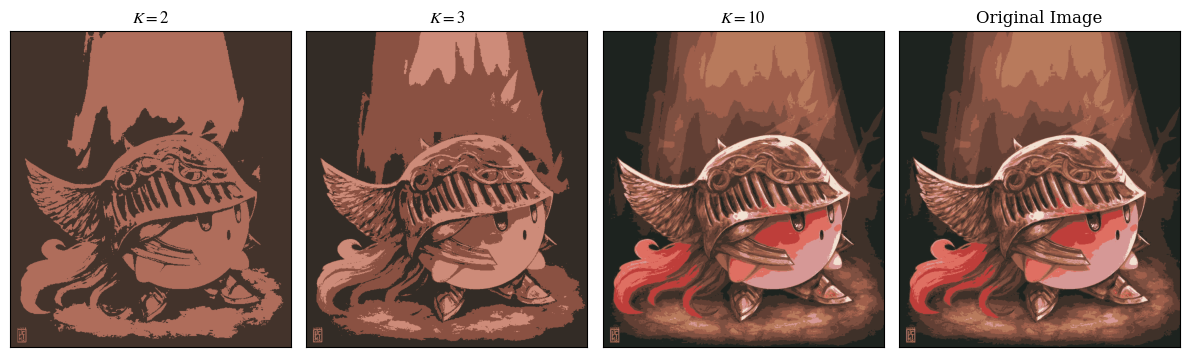

In [52]:
from sklearn.cluster import KMeans
X = img.reshape(-1, 3)
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
def img_show(img, ax, title):
    ax.imshow(pred)
    ax.set_title(title)
    ax.set_xticks([]); ax.set_yticks([])
for k, ax in zip([2, 3, 10], axs):
    kmeans = KMeans(n_clusters=k).fit(X)
    pred = np.array([kmeans.cluster_centers_[i] for i in kmeans.labels_]).reshape(img.shape)
    img_show(pred, ax, f"$K={k}$")
img_show(img, axs[-1], "Original Image")
fig.tight_layout()
savefig(fig, "kmeans_image_segmentation.png")
plt.show()

array([[0.39425465, 0.25314307, 0.20751639],
       [0.72485063, 0.48955159, 0.36966557],
       [0.25530789, 0.1964312 , 0.1650649 ],
       [0.95272875, 0.88639899, 0.82577075],
       [0.11846892, 0.14060399, 0.12541872],
       [0.51287196, 0.32039552, 0.25973675],
       [0.87789197, 0.43290061, 0.3830848 ],
       [0.7415133 , 0.24248689, 0.22791834],
       [0.84540914, 0.59962654, 0.59075187],
       [0.63673783, 0.37958032, 0.30162911]])

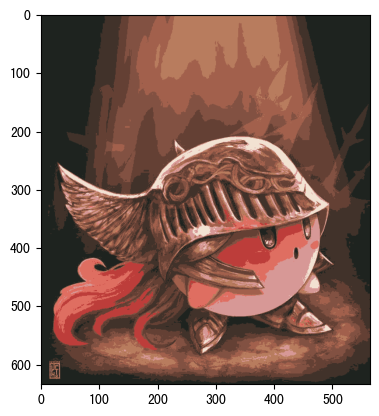